In [52]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import importlib
import basicfunc as bf
from scipy.special import erf

importlib.reload(bf)

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\libreria\\basicfunc.py'>

# 'normal' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 
- The integral of the histogram in the range mu ± n*sigma
- The plot data (x_fit, y_fit, bin_centers, counts) if you need to plot other thing

Integrale dell'istogramma nel range [-1.0879107646454984, 0.9537842069667191] = 355 ± 18


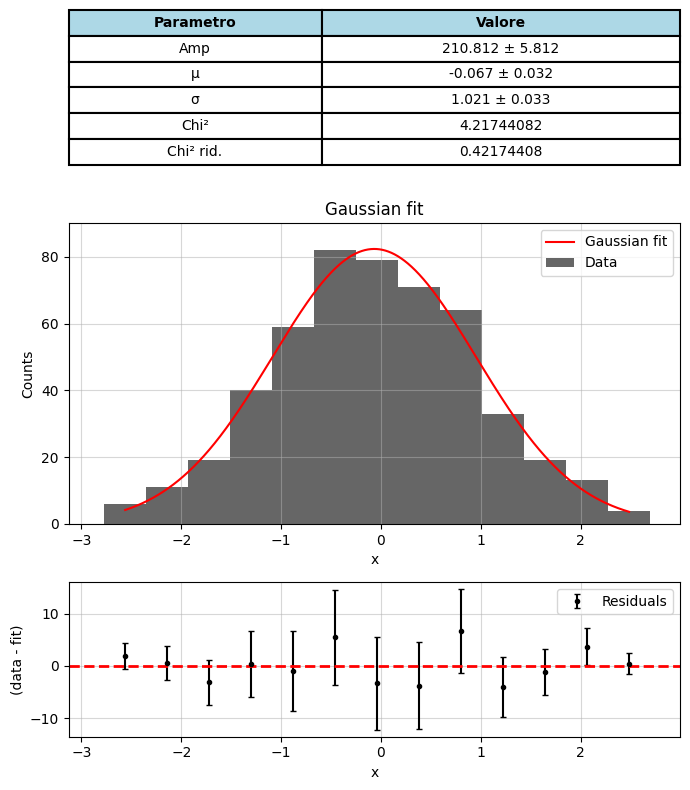

In [53]:
# Data generation 
data = np.random.normal(loc=0, scale=1, size=500)

# Uses the 'normal' fit function to fit a gaussian curve onto the data
ex_normal = bf.normal(data=data, xlabel="x", ylabel="Counts", titolo="Gaussian fit", n=1, plot=True)


# 'compton' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 
- The integral of the histogram in the range mu ± n*sigma
- The plot data (x_fit, y_fit, bin_centers, counts) if you need to plot other thing

Integrale dell'istogramma nel range [451.8713463488715, 552.2067749896205] = 2038 ± 45


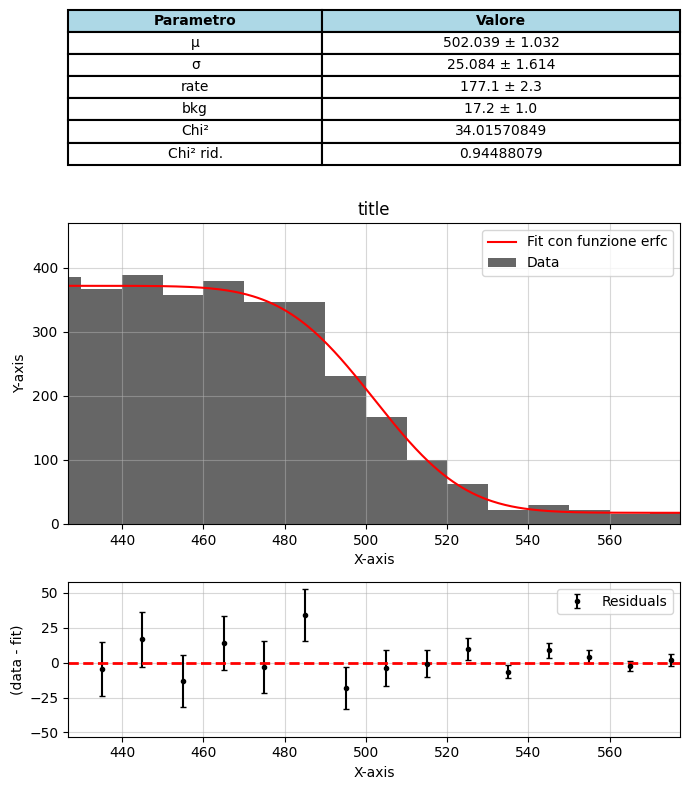

In [54]:
# Edge parameters
mu = 500
sigma = 20
rate = 1000
bkg = 50
x = np.linspace(0, 1000, 2000)
# Data generation with the erfc function
y_clean = rate * (1 - 0.5 * (1 + erf((x - mu) / (sigma * np.sqrt(2))))) + bkg
# Data generation with some noise
probability_distribution = y_clean / np.sum(y_clean)
prova = np.random.choice(x, size=20000, p=probability_distribution)

ex_compton = bf.compton(data=prova, b=100, xmin=300, xmax=700, n=2, plot=True)

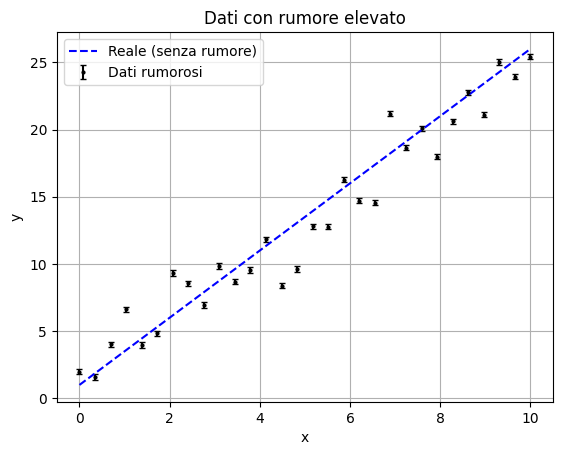

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

m = 2.2961898918242367 ± 0.012234272077306655
q = 1.6427567662273361 ± 0.07124092041696557
Chi-squared = 2071.5130146523575
Reduced chi-squared = 73.98260766615563


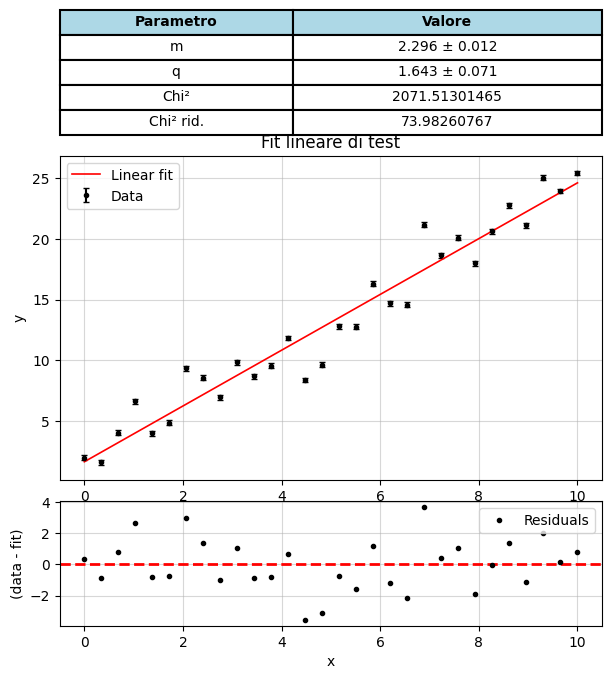

In [55]:
# PROVA DELLA FUNZIONE DI FIT LINEARE
# Semina per riproducibilità
np.random.seed(42)

# Parametri della retta
m_true = 2.5
q_true = 1.0

# Generazione dei dati
x = np.linspace(0, 10, 30)
y_clean = m_true * x + q_true
rumore = np.random.normal(0, 2.0, size=x.size)  # Rumore più forte (sigma=2.0)
y = y_clean + rumore

# Errori fittizi (sy) per simulare incertezza nella misura
sy = np.full_like(x, 0.2) #Incertezza costante pari a 2
sx = np.zeros_like(x)     # Nessun errore in x

# Plot veloce
plt.errorbar(x, y, yerr=sy, fmt='o', color='black', label='Dati rumorosi', markersize=2, capsize=2)
plt.plot(x, y_clean, '--', label='Reale (senza rumore)', color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dati con rumore elevato")
plt.grid(True)
plt.legend()
plt.show()

# Fit usando la tua funzione
prova_linear = bf.linear(x, y, sx=sx, sy=sy, xlabel="x", ylabel="y", titolo="Fit lineare di test", plot=True)

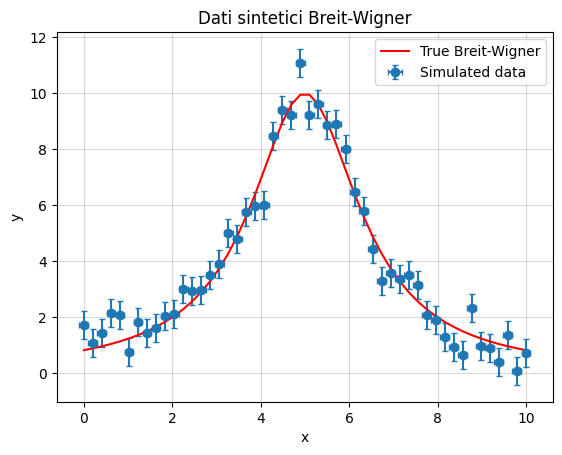

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Parametri ottimizzati:
-----------------------------------------------
a = 7.6062540990904015 ± 0.1660455637988117
gamma = 3.0247963466544374 ± 0.09368247611881518
x0 = 4.997766628396263 ± 0.031837411462684005
Chi-squared = 61.35277282608028
Reduced Chi-squared = 1.3053781452357507


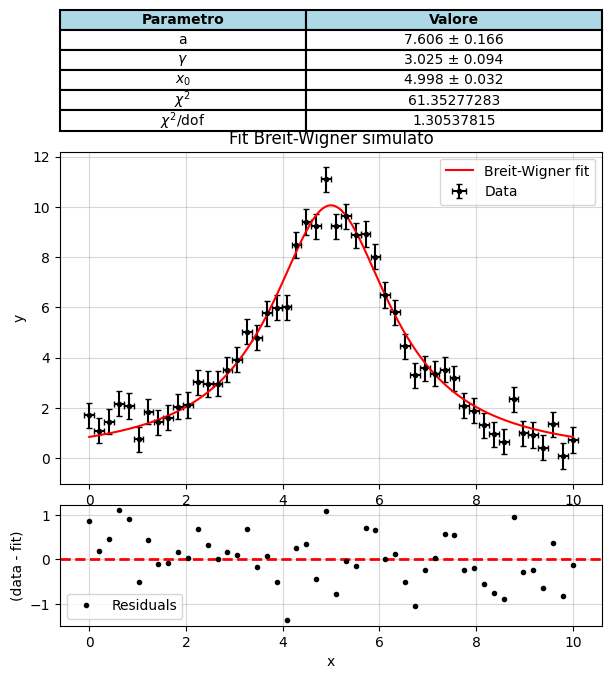

In [56]:
# Definizione della Breit-Wigner
def wigner(x, a, gamma, x0):
    return a * gamma**2 / ((x - x0)**2 + gamma**2)

# Parametri veri (usati per generare i dati)
a_true = 10
gamma_true = 1.5
x0_true = 5.0

# Generazione dei punti x e dei dati y con rumore
np.random.seed(0)
x = np.linspace(0, 10, 50)
y_clean = wigner(x, a_true, gamma_true, x0_true)
noise = np.random.normal(0, 0.5, size=x.shape)
y = y_clean + noise

# Incertezze simulate
sy = np.full_like(y, 0.5)
sx = np.full_like(x, 0.1)

# Plot dati sintetici (opzionale)
plt.errorbar(x, y, yerr=sy, xerr=sx, fmt='o', label='Simulated data', capsize=2)
plt.plot(x, y_clean, label='True Breit-Wigner', color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dati sintetici Breit-Wigner")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

prova_breit = bf.breitwigner(x, y, sx=sx, sy=sy, xlabel="x", ylabel="y", titolo="Fit Breit-Wigner simulato", plot=True)